# Template Live data

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import requests

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

In [2]:
USER_AGENTS = [
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_3_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36"
]

HEADERS = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
VNDIRECT_DATA_HISTORY_URL = 'https://dchart-api.vndirect.com.vn/dchart/history'
URL = VNDIRECT_DATA_HISTORY_URL

In [3]:
def getStockHistoryData(ticker, timestamp_from=0, timestamp_to=0):
    if timestamp_from == 0:
        three_months = date.today() + relativedelta(months=-3)
        timestamp_from = datetime.strptime(three_months.strftime("%m/%d/%Y") + ', 00:00:0', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()
    if timestamp_to == 0:
        timestamp_to = datetime.strptime(date.today().strftime("%m/%d/%Y") + ', 23:59:00', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()

    params = {
        "resolution": "5",
        "symbol": str(ticker),
        "from": int(timestamp_from),
        "to": int(timestamp_to)
    }

    x = requests.get(URL, params=params, headers=HEADERS)
    response = x.json()

    import numpy as np
    import pandas as pd

    timestamp = np.array(response['t']).astype(int)
    close = np.array(response['c']).astype(float)
    open = np.array(response['o']).astype(float)
    high = np.array(response['h']).astype(float)
    low = np.array(response['l']).astype(float)
    volume = np.array(response['v']).astype(int)

    dataset = pd.DataFrame({'Time': timestamp, 'Open': list(open), 'High': list(high), 'Low': list(low),
                            'Close': list(close), 'Volume': list(volume)},
                           columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    return dataset

In [4]:
def prepareData(htd):
    if 'Time' in htd.columns:
        from datetime import datetime

        htd['DateStr'] = htd.apply(
            lambda x: datetime.fromtimestamp(x['Time']).strftime("%Y-%m-%d %H:%M:%S"), axis=1)

    htd['Date'] = pd.to_datetime(htd['DateStr'])
    ticker_data = htd.set_index('Date')
    ticker_data.drop(columns=['Time', 'DateStr'], inplace=True)
    return ticker_data

### Load Price Data

In [5]:
ticker = "VN30F1M"
htd = getStockHistoryData(ticker, 0, 0)
ticker_data = prepareData(htd)
ticker_data = ticker_data.dropna()
ticker_data

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-12 09:00:00,1302.2,1303.1,1301.4,1303.1,5498
2024-06-12 09:05:00,1303.2,1304.1,1302.9,1304.1,3514
2024-06-12 09:10:00,1304.0,1304.2,1302.8,1303.0,2249
2024-06-12 09:15:00,1303.0,1304.1,1301.5,1301.8,4969
2024-06-12 09:20:00,1301.8,1303.3,1301.6,1303.3,3093
...,...,...,...,...,...
2024-09-12 14:15:00,1302.2,1302.6,1301.8,1302.0,4361
2024-09-12 14:20:00,1301.9,1301.9,1299.3,1299.5,9427
2024-09-12 14:25:00,1299.3,1300.0,1298.1,1299.7,8281


In [6]:
# Tinh tu ngay dao han phai sinh thang truoc
data = ticker_data[ticker_data.index > '2024-08-16 23:00:00']
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-19 09:00:00,1289.0,1290.4,1288.3,1289.3,5560
2024-08-19 09:05:00,1289.3,1291.1,1289.3,1290.8,2435
2024-08-19 09:10:00,1290.7,1291.6,1290.3,1291.3,1489
2024-08-19 09:15:00,1291.4,1292.2,1291.2,1292.0,4454
2024-08-19 09:20:00,1292.1,1292.8,1291.1,1291.2,2920
...,...,...,...,...,...
2024-09-12 14:15:00,1302.2,1302.6,1301.8,1302.0,4361
2024-09-12 14:20:00,1301.9,1301.9,1299.3,1299.5,9427
2024-09-12 14:25:00,1299.3,1300.0,1298.1,1299.7,8281


In [7]:
data['Volume_cumsum'] = data['Volume'].cumsum()
data

,Open,High,Low,Close,Volume,Volume_cumsum
Date,,,,,,
2024-08-19 09:00:00,1289.0,1290.4,1288.3,1289.3,5560,5560
2024-08-19 09:05:00,1289.3,1291.1,1289.3,1290.8,2435,7995
2024-08-19 09:10:00,1290.7,1291.6,1290.3,1291.3,1489,9484
2024-08-19 09:15:00,1291.4,1292.2,1291.2,1292.0,4454,13938
2024-08-19 09:20:00,1292.1,1292.8,1291.1,1291.2,2920,16858
...,...,...,...,...,...,...
2024-09-12 14:15:00,1302.2,1302.6,1301.8,1302.0,4361,2938678
2024-09-12 14:20:00,1301.9,1301.9,1299.3,1299.5,9427,2948105
2024-09-12 14:25:00,1299.3,1300.0,1298.1,1299.7,8281,2956386


In [11]:
data['value'] = data.apply(lambda r: r['Volume'] * (r['Close'] + r['Open'] + r['High'] + r['Low']) / 4, axis=1)
data['value_cumsum'] = data['value'].cumsum()
data['vwap'] = data.apply(lambda r: r['value_cumsum'] / r['Volume_cumsum'], axis=1)
data

,Open,High,Low,Close,Volume,Volume_cumsum,value,value_cum,value_cumsum,vwap
Date,,,,,,,,,,
2024-08-19 09:00:00,1289.0,1290.4,1288.3,1289.3,5560,5560,7.168230e+06,7.168230e+06,7.168230e+06,1289.250000
2024-08-19 09:05:00,1289.3,1291.1,1289.3,1290.8,2435,7995,3.141454e+06,1.030968e+07,1.030968e+07,1289.516495
2024-08-19 09:10:00,1290.7,1291.6,1290.3,1291.3,1489,9484,1.922262e+06,1.223195e+07,1.223195e+07,1289.745482
2024-08-19 09:15:00,1291.4,1292.2,1291.2,1292.0,4454,13938,5.753232e+06,1.798518e+07,1.798518e+07,1290.370064
2024-08-19 09:20:00,1292.1,1292.8,1291.1,1291.2,2920,16858,3.772056e+06,2.175723e+07,2.175723e+07,1290.617745
...,...,...,...,...,...,...,...,...,...,...
2024-09-12 14:15:00,1302.2,1302.6,1301.8,1302.0,4361,2938678,5.678676e+06,3.849533e+09,3.849533e+09,1309.954076
2024-09-12 14:20:00,1301.9,1301.9,1299.3,1299.5,9427,2948105,1.226123e+07,3.861794e+09,3.861794e+09,1309.924325
2024-09-12 14:25:00,1299.3,1300.0,1298.1,1299.7,8281,2956386,1.075930e+07,3.872554e+09,3.872554e+09,1309.894495


In [17]:
data[data.Close > data.vwap]

,Open,High,Low,Close,Volume,Volume_cumsum,value,value_cum,value_cumsum,vwap
Date,,,,,,,,,,
2024-08-19 09:00:00,1289.0,1290.4,1288.3,1289.3,5560,5560,7.168230e+06,7.168230e+06,7.168230e+06,1289.250000
2024-08-19 09:05:00,1289.3,1291.1,1289.3,1290.8,2435,7995,3.141454e+06,1.030968e+07,1.030968e+07,1289.516495
2024-08-19 09:10:00,1290.7,1291.6,1290.3,1291.3,1489,9484,1.922262e+06,1.223195e+07,1.223195e+07,1289.745482
2024-08-19 09:15:00,1291.4,1292.2,1291.2,1292.0,4454,13938,5.753232e+06,1.798518e+07,1.798518e+07,1290.370064
2024-08-19 09:20:00,1292.1,1292.8,1291.1,1291.2,2920,16858,3.772056e+06,2.175723e+07,2.175723e+07,1290.617745
...,...,...,...,...,...,...,...,...,...,...
2024-09-05 13:15:00,1315.4,1315.6,1314.2,1314.3,2559,2008806,3.364765e+06,2.639031e+09,2.639031e+09,1313.731034
2024-09-05 13:30:00,1313.7,1314.2,1313.6,1314.0,2063,2019269,2.710524e+06,2.652775e+09,2.652775e+09,1313.730331
2024-09-05 13:35:00,1314.0,1314.6,1313.9,1313.9,1999,2021268,2.626886e+06,2.655402e+09,2.655402e+09,1313.730696


In [18]:
data[data.Close < data.vwap]

,Open,High,Low,Close,Volume,Volume_cumsum,value,value_cum,value_cumsum,vwap
Date,,,,,,,,,,
2024-08-19 09:30:00,1290.9,1290.9,1290.0,1290.5,3047,22641,3.932382e+06,2.922166e+07,2.922166e+07,1290.652143
2024-08-21 09:00:00,1300.8,1301.3,1298.9,1299.7,6352,398676,8.258712e+06,5.182466e+08,5.182466e+08,1299.919344
2024-08-21 09:05:00,1299.6,1300.3,1299.6,1299.7,1889,400565,2.455322e+06,5.207020e+08,5.207020e+08,1299.918781
2024-08-21 09:10:00,1299.7,1300.2,1299.5,1299.6,2005,402570,2.605999e+06,5.233080e+08,5.233080e+08,1299.917941
2024-08-21 09:15:00,1299.6,1299.7,1298.2,1299.1,4157,406727,5.400567e+06,5.287085e+08,5.287085e+08,1299.910092
...,...,...,...,...,...,...,...,...,...,...
2024-09-12 14:15:00,1302.2,1302.6,1301.8,1302.0,4361,2938678,5.678676e+06,3.849533e+09,3.849533e+09,1309.954076
2024-09-12 14:20:00,1301.9,1301.9,1299.3,1299.5,9427,2948105,1.226123e+07,3.861794e+09,3.861794e+09,1309.924325
2024-09-12 14:25:00,1299.3,1300.0,1298.1,1299.7,8281,2956386,1.075930e+07,3.872554e+09,3.872554e+09,1309.894495


In [15]:
import plotly.graph_objects as go
df = data.copy()
df.dropna(inplace=True)
# plot the candlesticks
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df.Open, 
                                     high=df.High,
                                     low=df.Low,
                                     close=df.Close), 
                      go.Scatter(x=df.index, y=df.vwap, line=dict(color='green', width=1))])

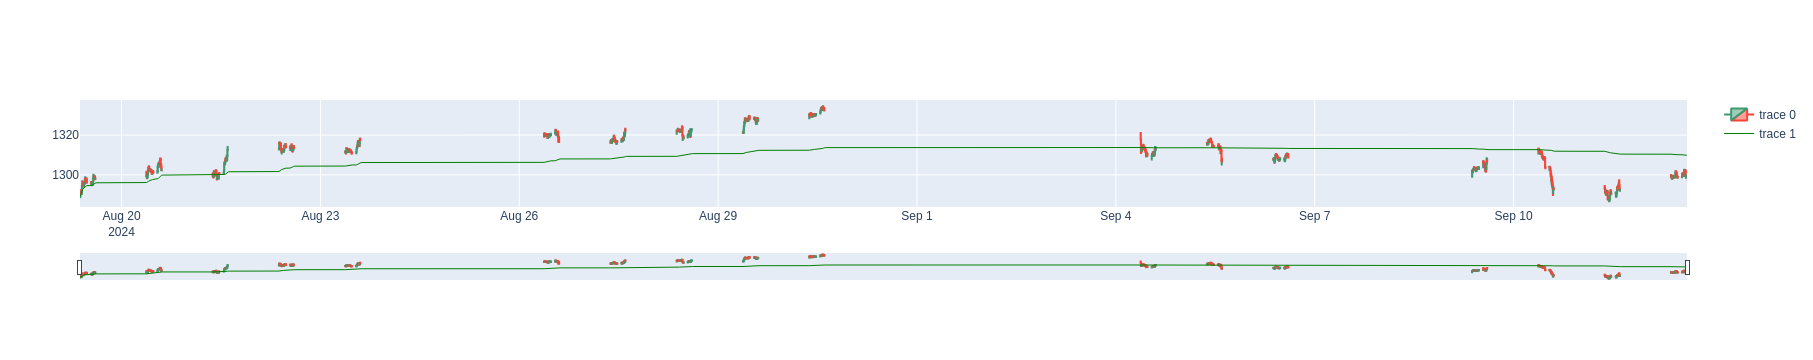

In [16]:
fig.show()